In [1]:
# Import PuLP modeler functions
!pip install pulp
from pulp import *
import random
import time
import numpy as np

# Implementierung Eine Liste

In [9]:
    Items = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'alang', 'q5', 'q6']

    ItemPairs = list(itertools.permutations(Items,2))

    height = {
         'a1': 594,
         'a2': 421,
         'a3': 297,
         'a4': 210,
         'a5': 148,
         'a6': 105,
         'alang': 105,
         'q5': 148,
         'q6': 104}

    width = {
         'a1': 841,
         'a2': 594,
         'a3': 420,
         'a4': 297,
         'a5': 210,
         'a6': 148,
         'alang': 210,
         'q5': 148,
         'q6': 104}
    
    itemValue = {x: height[x] * width[x] for x in Items}
    
    W = int(1189);
    H = int(1100);

    prob = LpProblem("2D Backpack",LpMaximize)

    # The problem variables are created
    packed = LpVariable.dicts("packed",(Items),0,10,LpInteger)
    rotated = LpVariable.dicts("rotated",(Items),0,1,LpInteger)
    x_origin = LpVariable.dicts("x_origin",(Items),0,W)
    y_origin = LpVariable.dicts("y_origin",(Items),0,H)

    x_overlap_right = LpVariable.dicts("x_overlap_right",(ItemPairs),0,1,LpInteger)
    x_overlap_left = LpVariable.dicts("x_overlap_left",(ItemPairs),0,1,LpInteger)
    y_overlap_above = LpVariable.dicts("y_overlap_above",(ItemPairs),0,1,LpInteger)
    y_overlap_below = LpVariable.dicts("y_overlap_below",(ItemPairs),0,1,LpInteger)

    # The arbitrary objective function is added
    prob += lpSum([packed[i]*itemValue[i] for i in Items]), "Objective Function"

    for (i,j) in ItemPairs:
        prob += x_origin[j] - x_origin[i] - (1-rotated[i])*width[i] - rotated[i] * height[i] + x_overlap_right[i,j] * 1189 >= 0, "overlap right %s %s" %(i,j)
        prob += x_origin[j] + (1-rotated[j])*width[j] + rotated[j]*height[j] - x_origin[i] - x_overlap_left[i,j] * 1189 <= 0, "overlap left %s %s" %(i,j)
        prob += y_origin[j] - y_origin[i] - (1-rotated[i]) * height[i] - rotated[i] * width[i] + y_overlap_above[i,j] * 1100 >= 0, "overlap above %s %s" %(i,j)
        prob += y_origin[j] + (1-rotated[j])*height[j] + rotated[j]*width[j] - y_origin[i] - y_overlap_below[i,j] * 1100 <= 0, "overlap below %s %s" %(i,j)
        prob += x_overlap_right[i,j] + x_overlap_left[i,j] + y_overlap_below[i,j] + y_overlap_above[i,j] <= 3 + 3*((1-packed[i])+(1-packed[j])), "no overlap %s %s" %(i,j)

    for i in Items:
        prob += x_origin[i] + (1-rotated[i])*width[i] + rotated[i]* height[i] <= W + (1-packed[i]) * 1189, "maxWidth %s" %i
        prob += y_origin[i] + (1-rotated[i])*height[i] + rotated[i] * width[i] <= H + (1-packed[i]) * 1100, "maxHeight %s" %i  

    prob += W*H >= lpSum([packed[i] * width[i] * height[i] for i in Items]), "maxArea"

    # The problem is solved using PuLP's choice of Solver
    prob.solve(PULP_CBC_CMD(fracGap = 0.01, maxSeconds = 300))
    #prob.solve(GUROBI_CMD())
    print("Status = %s" % LpStatus[prob.status])
    # Print the value of the objective
    print("Objective = %f" % value(prob.objective))
    # Which items are packed
    counter = 0
    for i in Items:
        if packed[i].varValue >= 0.9:
            print(packed[i])
            counter = counter + 1
            
    summe = 0
    start = np.array([time.time()for n in range(1000000)])
    summe = ([(summe+1)for n in range(1000000)])
    ende = np.array(time.time())
    print((ende-start))
    
    print(np.sum(ende-start))

    print("---------------------")


Status = Optimal
Objective = 1038128.000000
packed_a1
packed_a2
packed_a3
packed_a4
packed_a5
packed_a6
packed_alang
packed_q5
packed_q6
[0.42658091 0.42658091 0.42658091 ... 0.21599984 0.21599984 0.21599984]
323508.88148760796
---------------------


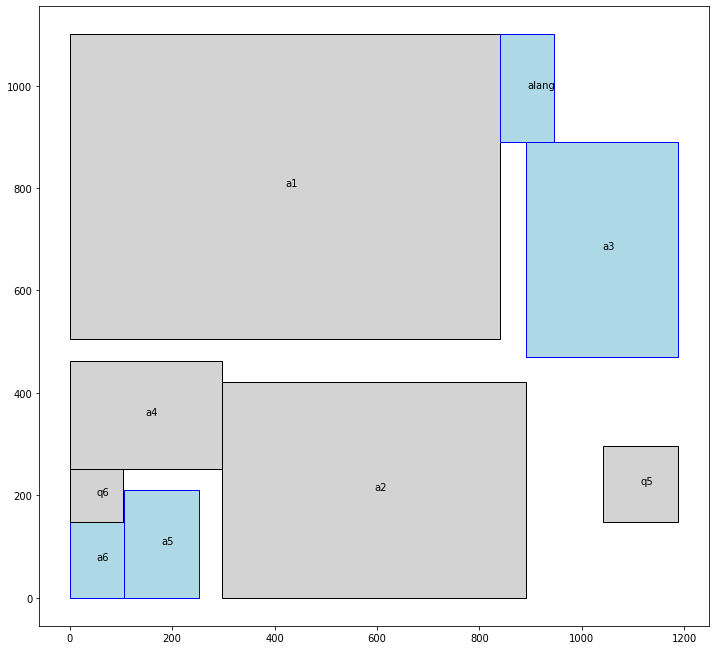

In [10]:
## import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 12]

plt.axes()
rectangle = plt.Rectangle((0,0), W, H, fc='white',ec="white")

# Create a Rectangle patch
for i in Items:
    if packed[i].varValue >= 0.9:
        if rotated[i].varValue == 0:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),width[i],height[i],edgecolor='black',facecolor='lightgray')
            plt.gca().add_patch(rect)
            centerx = width[i]  /2 + x_origin[i].varValue
            centery = height[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
        else:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),height[i],width[i],edgecolor='blue',facecolor='lightblue')
            plt.gca().add_patch(rect)
            centerx = height[i]  /2 + x_origin[i].varValue
            centery = width[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
    if packed[i].varValue < 0.9:
        rect = patches.Rectangle((0,0),width[i],height[i],edgecolor='red',facecolor='none')
        plt.gca().add_patch(rect)
        print(i,":",x_origin[i].varValue,y_origin[i].varValue,width[i],height[i] )



plt.axis('scaled')
plt.show()

# Implementierung Zweite liste mit gleichen werten

In [15]:
    Items = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'alang', 'q5', 'q6']
    Items2 = ['a12', 'a22', 'a32', 'a42', 'a52', 'a62', 'alang2', 'q52', 'q62']
    Items3 = Items+Items2


    ItemPairs = list(itertools.permutations(Items3,2))

    height = {
         'a1': 594,
         'a2': 421,
         'a3': 297,
         'a4': 210,
         'a5': 148,
         'a6': 105,
         'alang': 105,
         'q5': 148,
         'q6': 104,
         'a12': 594,
         'a22': 421,
         'a32': 297,
         'a42': 210,
         'a52': 148,
         'a62': 105,
         'alang2': 105,
         'q52': 148,
         'q62': 104}

    width = {
         'a1': 841,
         'a2': 594,
         'a3': 420,
         'a4': 297,
         'a5': 210,
         'a6': 148,
         'alang': 210,
         'q5': 148,
         'q6': 104,
         'a12': 841,
         'a22': 594,
         'a32': 420,
         'a42': 297,
         'a52': 210,
         'a62': 148,
         'alang2': 210,
         'q52': 148,
         'q62': 104}
    
    itemValue = {x: height[x] * width[x] for x in Items3}
    
    W = int(1189);
    H = int(1100);

    prob = LpProblem("2D Backpack",LpMaximize)

    # The problem variables are created
    packed = LpVariable.dicts("packed",(Items),1,10,LpInteger)
    rotated = LpVariable.dicts("rotated",(Items3),0,1,LpInteger)
    x_origin = LpVariable.dicts("x_origin",(Items3),0,W)
    y_origin = LpVariable.dicts("y_origin",(Items3),0,H)
    
    packed2 = LpVariable.dicts("packed2",(Items2),0,1,LpInteger)
    packed3 = {**packed, **packed2}    
    
    x_overlap_right = LpVariable.dicts("x_overlap_right",(ItemPairs),0,1,LpInteger)
    x_overlap_left = LpVariable.dicts("x_overlap_left",(ItemPairs),0,1,LpInteger)
    y_overlap_above = LpVariable.dicts("y_overlap_above",(ItemPairs),0,1,LpInteger)
    y_overlap_below = LpVariable.dicts("y_overlap_below",(ItemPairs),0,1,LpInteger)

    # The arbitrary objective function is added
    prob += lpSum([packed3[i]*itemValue[i] for i in Items3]), "Objective Function"

    for (i,j) in ItemPairs:
        prob += x_origin[j] - x_origin[i] - (1-rotated[i])*width[i] - rotated[i] * height[i] + x_overlap_right[i,j] * 1189 >= 0, "overlap right %s %s" %(i,j)
        prob += x_origin[j] + (1-rotated[j])*width[j] + rotated[j]*height[j] - x_origin[i] - x_overlap_left[i,j] * 1189 <= 0, "overlap left %s %s" %(i,j)
        prob += y_origin[j] - y_origin[i] - (1-rotated[i]) * height[i] - rotated[i] * width[i] + y_overlap_above[i,j] * 1100 >= 0, "overlap above %s %s" %(i,j)
        prob += y_origin[j] + (1-rotated[j])*height[j] + rotated[j]*width[j] - y_origin[i] - y_overlap_below[i,j] * 1100 <= 0, "overlap below %s %s" %(i,j)
        prob += x_overlap_right[i,j] + x_overlap_left[i,j] + y_overlap_below[i,j] + y_overlap_above[i,j] <= 3 + 3*((1-packed3[i])+(1-packed3[j])), "no overlap %s %s" %(i,j)

    for i in Items3:
        prob += x_origin[i] + (1-rotated[i])*width[i] + rotated[i]* height[i] <= W + (1-packed3[i]) * 1189, "maxWidth %s" %i
        prob += y_origin[i] + (1-rotated[i])*height[i] + rotated[i] * width[i] <= H + (1-packed3[i]) * 1100, "maxHeight %s" %i  

    prob += W*H >= lpSum([packed3[i] * width[i] * height[i] for i in Items3]), "maxArea"

    # The problem is solved using PuLP's choice of Solver
    prob.solve(PULP_CBC_CMD(fracGap = 0.01, maxSeconds = 1200))
    #prob.solve(GUROBI_CMD())
    print("Status = %s" % LpStatus[prob.status])
    # Print the value of the objective
    print("Objective = %f" % value(prob.objective))
    # Which items are packed
    counter = 0
    for i in Items3:
        if packed3[i].varValue >= 0.9:
            print(packed3[i])
            counter = counter + 1

    print("---------------------")


Status = Optimal
Objective = 1258104.000000
packed_a1
packed_a2
packed_a3
packed_a4
packed_a5
packed_a6
packed_alang
packed_q5
packed_q6
packed2_a32
packed2_a42
packed2_alang2
packed2_q62
---------------------


a12 : 0.0 0.0 841 594
a22 : 0.0 0.0 594 421
a52 : 385.0 848.0 210 148
a62 : 831.0 6.0 148 105
q52 : 0.0 0.0 148 148


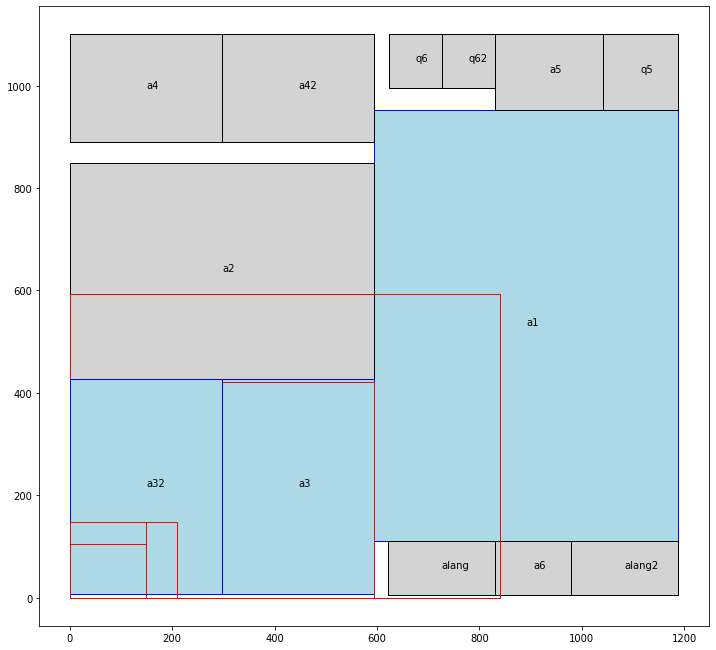

In [16]:
## import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 12]

plt.axes()
rectangle = plt.Rectangle((0,0), W, H, fc='white',ec="white")

# Create a Rectangle patch
for i in Items3:
    if packed3[i].varValue >= 0.9:
        if rotated[i].varValue == 0:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),width[i],height[i],edgecolor='black',facecolor='lightgray')
            plt.gca().add_patch(rect)
            centerx = width[i]  /2 + x_origin[i].varValue
            centery = height[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
        else:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),height[i],width[i],edgecolor='blue',facecolor='lightblue')
            plt.gca().add_patch(rect)
            centerx = height[i]  /2 + x_origin[i].varValue
            centery = width[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
    if packed3[i].varValue < 0.9:
        rect = patches.Rectangle((0,0),width[i],height[i],edgecolor='red',facecolor='none')
        plt.gca().add_patch(rect)
        print(i,":",x_origin[i].varValue,y_origin[i].varValue,width[i],height[i] )



plt.axis('scaled')
plt.show()

# Implementierung von einer zweiten liste mit maximalen Objekten. NOT SOLVED

In [19]:
    Items = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'alang', 'q5', 'q6']
    Items2 = ['a32',
              'a42', 'a43', 'a44',
              'a52', 'a53', 'a54', 'a55', 'a56','a57','a58',
              'a62','a63','a64','a65','a66','a67','a68','a69','a610','a611','a612','a613','a614','a615','a616',
             'alang2','alang3','alang4','alang5','alang6','alang7','alang8','alang9','alang10','alang11',
              'q52','q53','q54','q55','q56','q57','q58','q59','q510','q511',
             'q62','q63','q64','q65','q66','q67','q68','q69','q610','q611','q612','q613','q614','q615','q616','q617','q618','q619','q620','q621', 'q622']
    Items3 = Items+Items2


    ItemPairs = list(itertools.permutations(Items3,2))

    height = {
         'a1': 594,
         'a2': 421,
         'a3': 297,
         'a4': 210,
         'a5': 148,
         'a6': 105,
         'alang': 105,
         'q5': 148,
         'q6': 104,
          'a32': 297,
          'a42' :210, 'a43':210, 'a44':210,
         'a52':148, 'a53':148, 'a54':148, 'a55':148, 'a56':148,'a57':148,'a58':148,
         'a62':105,'a63':105,'a64':105,'a65':105,'a66':105,'a67':105,'a68':105,'a69':105,'a610':105,'a611':105,'a612':105,'a613':105,'a614':105,'a615':105,'a616':105,
        'alang2':105,'alang3':105,'alang4':105,'alang5':105,'alang6':105,'alang7':105,'alang8':105,'alang9':105,'alang10':105,'alang11':105,
        'q52':148,'q53':148,'q54':148,'q55':148,'q56':148,'q57':148,'q58':148,'q59':148,'q510':148,'q511':148,
        'q62':104,'q63':104,'q64':104,'q65':104,'q66':104,'q67':104,'q68':104,'q69':104,'q610':104,'q611':104,'q612':104,'q613':104,'q614':104,'q615':104,'q616':104,'q617':104,'q618':104,'q619':104,'q620':104,'q621':104, 'q622':104
        }

    width = {
         'a1': 841,
         'a2': 594,
         'a3': 420,
         'a4': 297,
         'a5': 210,
         'a6': 148,
         'alang': 210,
         'q5': 148,
         'q6': 104,
          'a32': 420,
          'a42' :297, 'a43':297, 'a44':297,
         'a52':210, 'a53':210, 'a54':210, 'a55':210, 'a56':210,'a57':210,'a58':210,
         'a62':148,'a63':148,'a64':148,'a65':148,'a66':148,'a67':148,'a68':148,'a69':148,'a610':148,'a611':148,'a612':148,'a613':148,'a614':148,'a615':148,'a616':148,
        'alang2':210,'alang3':210,'alang4':210,'alang5':210,'alang6':210,'alang7':210,'alang8':210,'alang9':210,'alang10':210,'alang11':210,
        'q52':148,'q53':148,'q54':148,'q55':148,'q56':148,'q57':148,'q58':148,'q59':148,'q510':148,'q511':148,
        'q62':104,'q63':104,'q64':104,'q65':104,'q66':104,'q67':104,'q68':104,'q69':104,'q610':104,'q611':104,'q612':104,'q613':104,'q614':104,'q615':104,'q616':104,'q617':104,'q618':104,'q619':104,'q620':104,'q621':104, 'q622':104
        }
    
    itemValue = {x: height[x] * width[x] for x in Items3}
    
    W = int(1189);
    H = int(1100);

    prob = LpProblem("2D Backpack",LpMaximize)

    # The problem variables are created
    packed = LpVariable.dicts("packed",(Items),1,10,LpInteger)
    rotated = LpVariable.dicts("rotated",(Items3),0,1,LpInteger)
    x_origin = LpVariable.dicts("x_origin",(Items3),0,W)
    y_origin = LpVariable.dicts("y_origin",(Items3),0,H)
    
    packed2 = LpVariable.dicts("packed2",(Items2),0,1,LpInteger)
    packed3 = {**packed, **packed2}    
    
    x_overlap_right = LpVariable.dicts("x_overlap_right",(ItemPairs),0,1,LpInteger)
    x_overlap_left = LpVariable.dicts("x_overlap_left",(ItemPairs),0,1,LpInteger)
    y_overlap_above = LpVariable.dicts("y_overlap_above",(ItemPairs),0,1,LpInteger)
    y_overlap_below = LpVariable.dicts("y_overlap_below",(ItemPairs),0,1,LpInteger)

    # The arbitrary objective function is added
    prob += lpSum([packed3[i]*itemValue[i] for i in Items3]), "Objective Function"

    for (i,j) in ItemPairs:
        prob += x_origin[j] - x_origin[i] - (1-rotated[i])*width[i] - rotated[i] * height[i] + x_overlap_right[i,j] * 1189 >= 0, "overlap right %s %s" %(i,j)
        prob += x_origin[j] + (1-rotated[j])*width[j] + rotated[j]*height[j] - x_origin[i] - x_overlap_left[i,j] * 1189 <= 0, "overlap left %s %s" %(i,j)
        prob += y_origin[j] - y_origin[i] - (1-rotated[i]) * height[i] - rotated[i] * width[i] + y_overlap_above[i,j] * 1100 >= 0, "overlap above %s %s" %(i,j)
        prob += y_origin[j] + (1-rotated[j])*height[j] + rotated[j]*width[j] - y_origin[i] - y_overlap_below[i,j] * 1100 <= 0, "overlap below %s %s" %(i,j)
        prob += x_overlap_right[i,j] + x_overlap_left[i,j] + y_overlap_below[i,j] + y_overlap_above[i,j] <= 3 + 3*((1-packed3[i])+(1-packed3[j])), "no overlap %s %s" %(i,j)

    for i in Items3:
        prob += x_origin[i] + (1-rotated[i])*width[i] + rotated[i]* height[i] <= W + (1-packed3[i]) * 1189, "maxWidth %s" %i
        prob += y_origin[i] + (1-rotated[i])*height[i] + rotated[i] * width[i] <= H + (1-packed3[i]) * 1100, "maxHeight %s" %i  

    prob += W*H >= lpSum([packed3[i] * width[i] * height[i] for i in Items3]), "maxArea"

    # The problem is solved using PuLP's choice of Solver
    prob.solve(PULP_CBC_CMD(fracGap = 0.01, maxSeconds = 1200))
    #prob.solve(GUROBI_CMD())
    print("Status = %s" % LpStatus[prob.status])
    # Print the value of the objective
    print("Objective = %f" % value(prob.objective))
    # Which items are packed
    counter = 0
    for i in Items3:
        if packed3[i].varValue >= 0.9:
            print(packed3[i])
            counter = counter + 1

    print("---------------------")


Status = Not Solved
Objective = 1307900.001478
packed_a1
packed_a2
packed_a3
packed_a4
packed_a5
packed_a6
packed_alang
packed_q5
packed_q6
packed2_a42
---------------------


a32 : 0.0 0.0 420 297
a43 : 0.0 0.0 297 210
a44 : 0.0 0.0 297 210
a52 : 0.0 0.0 210 148
a53 : 0.0 0.0 210 148
a54 : 0.0 0.0 210 148
a55 : 0.0 0.0 210 148
a56 : 0.0 0.0 210 148
a57 : 0.0 0.0 210 148
a58 : 0.0 0.0 210 148
a62 : 0.0 0.0 148 105
a63 : 0.0 0.0 148 105
a64 : 0.0 0.0 148 105
a65 : 0.0 0.0 148 105
a66 : 0.0 0.0 148 105
a67 : 0.0 104.0 148 105
a68 : 0.0 0.0 148 105
a69 : 0.0 0.0 148 105
a610 : 0.0 0.0 148 105
a611 : 0.0 0.0 148 105
a612 : 0.0 0.0 148 105
a613 : 0.0 0.0 148 105
a614 : 0.0 0.0 148 105
a615 : 0.0 0.0 148 105
a616 : 0.0 0.0 148 105
alang2 : 0.0 0.0 210 105
alang3 : 104.0 0.0 210 105
alang4 : 0.0 0.0 210 105
alang5 : 0.0 0.0 210 105
alang6 : 0.0 0.0 210 105
alang7 : 0.0 0.0 210 105
alang8 : 0.0 0.0 210 105
alang9 : 0.0 0.0 210 105
alang10 : 0.0 0.0 210 105
alang11 : 0.0 0.0 210 105
q52 : 0.0 104.0 148 148
q53 : 0.0 0.0 148 148
q54 : 0.0 0.0 148 148
q55 : 0.0 0.0 148 148
q56 : 0.0 0.0 148 148
q57 : 0.0 0.0 148 148
q58 : 0.0 104.0 148 148
q59 : 0.0 0.0 148 148
q510 : 

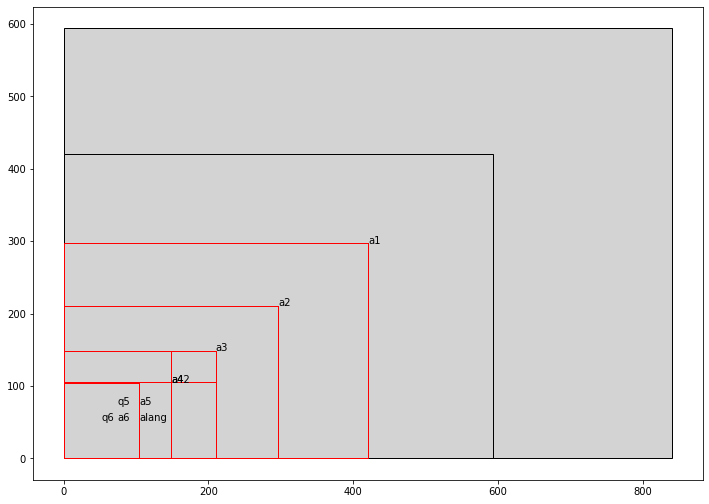

In [18]:
## import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 12]

plt.axes()
rectangle = plt.Rectangle((0,0), W, H, fc='white',ec="white")

# Create a Rectangle patch
for i in Items3:
    if packed3[i].varValue >= 0.9:
        if rotated[i].varValue == 0:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),width[i],height[i],edgecolor='black',facecolor='lightgray')
            plt.gca().add_patch(rect)
            centerx = width[i]  /2 + x_origin[i].varValue
            centery = height[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
        else:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),height[i],width[i],edgecolor='blue',facecolor='lightblue')
            plt.gca().add_patch(rect)
            centerx = height[i]  /2 + x_origin[i].varValue
            centery = width[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
    if packed3[i].varValue < 0.9:
        rect = patches.Rectangle((0,0),width[i],height[i],edgecolor='red',facecolor='none')
        plt.gca().add_patch(rect)
        print(i,":",x_origin[i].varValue,y_origin[i].varValue,width[i],height[i] )



plt.axis('scaled')
plt.show()

# Exkurs Zeit

In [11]:
    Items = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'alang', 'q5', 'q6','a12', 'a22', 'a32', 'a42', 'a52', 'a62', 'alang2', 'q52', 'q62']

    ItemPairs = list(itertools.permutations(Items,2))

    height = {
         'a1': 594,
         'a2': 421,
         'a3': 297,
         'a4': 210,
         'a5': 148,
         'a6': 105,
         'alang': 105,
         'q5': 148,
         'q6': 104,
         'a12': 594,
         'a22': 421,
         'a32': 297,
         'a42': 210,
         'a52': 148,
         'a62': 105,
         'alang2': 105,
         'q52': 148,
         'q62': 104}

    width = {
         'a1': 841,
         'a2': 594,
         'a3': 420,
         'a4': 297,
         'a5': 210,
         'a6': 148,
         'alang': 210,
         'q5': 148,
         'q6': 104,
         'a12': 841,
         'a22': 594,
         'a32': 420,
         'a42': 297,
         'a52': 210,
         'a62': 148,
         'alang2': 210,
         'q52': 148,
         'q62': 104}
    
    itemValue = {x: height[x] * width[x] for x in Items}
    
    W = int(1189);
    H = int(1100);

    prob = LpProblem("2D Backpack",LpMaximize)

    # The problem variables are created
    packed = LpVariable.dicts("packed",(Items),0,10,LpInteger)
    rotated = LpVariable.dicts("rotated",(Items),0,1,LpInteger)
    x_origin = LpVariable.dicts("x_origin",(Items),0,W)
    y_origin = LpVariable.dicts("y_origin",(Items),0,H)

    x_overlap_right = LpVariable.dicts("x_overlap_right",(ItemPairs),0,1,LpInteger)
    x_overlap_left = LpVariable.dicts("x_overlap_left",(ItemPairs),0,1,LpInteger)
    y_overlap_above = LpVariable.dicts("y_overlap_above",(ItemPairs),0,1,LpInteger)
    y_overlap_below = LpVariable.dicts("y_overlap_below",(ItemPairs),0,1,LpInteger)

    # The arbitrary objective function is added
    prob += lpSum([packed[i]*itemValue[i] for i in Items]), "Objective Function"

    for (i,j) in ItemPairs:
        prob += x_origin[j] - x_origin[i] - (1-rotated[i])*width[i] - rotated[i] * height[i] + x_overlap_right[i,j] * 1189 >= 0, "overlap right %s %s" %(i,j)
        prob += x_origin[j] + (1-rotated[j])*width[j] + rotated[j]*height[j] - x_origin[i] - x_overlap_left[i,j] * 1189 <= 0, "overlap left %s %s" %(i,j)
        prob += y_origin[j] - y_origin[i] - (1-rotated[i]) * height[i] - rotated[i] * width[i] + y_overlap_above[i,j] * 1100 >= 0, "overlap above %s %s" %(i,j)
        prob += y_origin[j] + (1-rotated[j])*height[j] + rotated[j]*width[j] - y_origin[i] - y_overlap_below[i,j] * 1100 <= 0, "overlap below %s %s" %(i,j)
        prob += x_overlap_right[i,j] + x_overlap_left[i,j] + y_overlap_below[i,j] + y_overlap_above[i,j] <= 3 + 3*((1-packed[i])+(1-packed[j])), "no overlap %s %s" %(i,j)

    for i in Items:
        prob += x_origin[i] + (1-rotated[i])*width[i] + rotated[i]* height[i] <= W + (1-packed[i]) * 1189, "maxWidth %s" %i
        prob += y_origin[i] + (1-rotated[i])*height[i] + rotated[i] * width[i] <= H + (1-packed[i]) * 1100, "maxHeight %s" %i  

    prob += W*H >= lpSum([packed[i] * width[i] * height[i] for i in Items]), "maxArea"

    # The problem is solved using PuLP's choice of Solver
    prob.solve(PULP_CBC_CMD(fracGap = 0.01, maxSeconds = 300))
    #prob.solve(GUROBI_CMD())
    print("Status = %s" % LpStatus[prob.status])
    # Print the value of the objective
    print("Objective = %f" % value(prob.objective))
    # Which items are packed
    counter = 0
    for i in Items:
        if packed[i].varValue >= 0.9:
            print(packed[i])
            counter = counter + 1
            
    summe = 0
    start = np.array([time.time()for n in range(1000000)])
    summe = ([(summe+1)for n in range(1000000)])
    ende = np.array(time.time())
    print((ende-start))
    
    print(np.sum(ende-start))

    print("---------------------")


Status = Optimal
Objective = 1207640.000000
packed_a2
packed_a3
packed_a4
packed_a6
packed_q6
packed_a12
packed_a32
packed_a42
packed_a52
packed_a62
packed_q62
[0.47837925 0.47837925 0.47837925 ... 0.24852943 0.24852943 0.24852943]
364594.7699649334
---------------------


a1 : 0.0 0.0 841 594
a5 : 447.0 0.0 210 148
alang : 0.0 0.0 210 105
q5 : 0.0 0.0 148 148
a22 : 0.0 0.0 594 421
alang2 : 0.0 0.0 210 105
q52 : 594.0 148.0 148 148


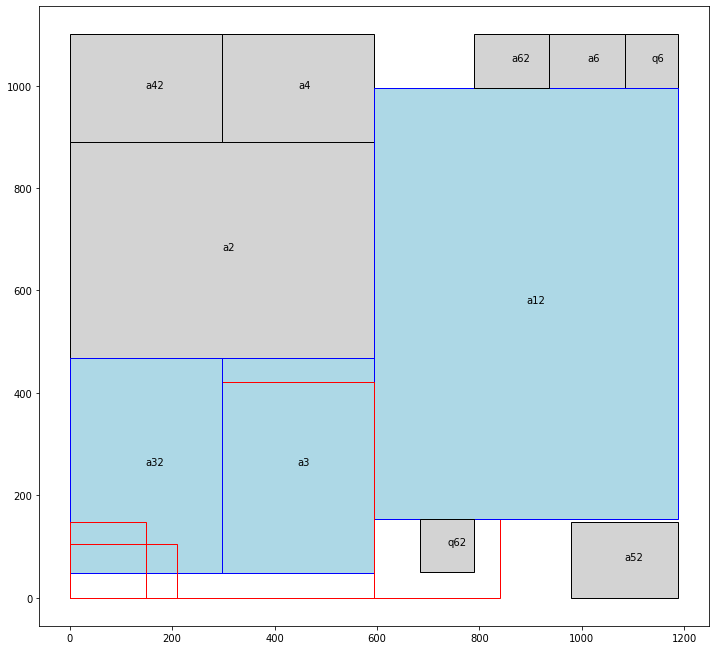

In [12]:
## import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 12]

plt.axes()
rectangle = plt.Rectangle((0,0), W, H, fc='white',ec="white")

# Create a Rectangle patch
for i in Items:
    if packed[i].varValue >= 0.9:
        if rotated[i].varValue == 0:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),width[i],height[i],edgecolor='black',facecolor='lightgray')
            plt.gca().add_patch(rect)
            centerx = width[i]  /2 + x_origin[i].varValue
            centery = height[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
        else:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),height[i],width[i],edgecolor='blue',facecolor='lightblue')
            plt.gca().add_patch(rect)
            centerx = height[i]  /2 + x_origin[i].varValue
            centery = width[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
    if packed[i].varValue < 0.9:
        rect = patches.Rectangle((0,0),width[i],height[i],edgecolor='red',facecolor='none')
        plt.gca().add_patch(rect)
        print(i,":",x_origin[i].varValue,y_origin[i].varValue,width[i],height[i] )



plt.axis('scaled')
plt.show()

# Optimierung einer kleinen Fläche

In [20]:
    Items = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'alang', 'q5', 'q6']

    ItemPairs = list(itertools.permutations(Items,2))

    height = {
         'a1': 594,
         'a2': 421,
         'a3': 297,
         'a4': 210,
         'a5': 148,
         'a6': 105,
         'alang': 105,
         'q5': 148,
         'q6': 104}

    width = {
         'a1': 841,
         'a2': 594,
         'a3': 420,
         'a4': 297,
         'a5': 210,
         'a6': 148,
         'alang': 210,
         'q5': 148,
         'q6': 104}
    
    itemValue = {x: height[x] * width[x] for x in Items}
    
    W = int(1189);
    H = int(850);

    prob = LpProblem("2D Backpack",LpMaximize)

    # The problem variables are created
    packed = LpVariable.dicts("packed",(Items),0,10,LpInteger)
    rotated = LpVariable.dicts("rotated",(Items),0,1,LpInteger)
    x_origin = LpVariable.dicts("x_origin",(Items),0,W)
    y_origin = LpVariable.dicts("y_origin",(Items),0,H)

    x_overlap_right = LpVariable.dicts("x_overlap_right",(ItemPairs),0,1,LpInteger)
    x_overlap_left = LpVariable.dicts("x_overlap_left",(ItemPairs),0,1,LpInteger)
    y_overlap_above = LpVariable.dicts("y_overlap_above",(ItemPairs),0,1,LpInteger)
    y_overlap_below = LpVariable.dicts("y_overlap_below",(ItemPairs),0,1,LpInteger)

    # The arbitrary objective function is added
    prob += lpSum([packed[i]*itemValue[i] for i in Items]), "Objective Function"

    for (i,j) in ItemPairs:
        prob += x_origin[j] - x_origin[i] - (1-rotated[i])*width[i] - rotated[i] * height[i] + x_overlap_right[i,j] * 1189 >= 0, "overlap right %s %s" %(i,j)
        prob += x_origin[j] + (1-rotated[j])*width[j] + rotated[j]*height[j] - x_origin[i] - x_overlap_left[i,j] * 1189 <= 0, "overlap left %s %s" %(i,j)
        prob += y_origin[j] - y_origin[i] - (1-rotated[i]) * height[i] - rotated[i] * width[i] + y_overlap_above[i,j] * 1100 >= 0, "overlap above %s %s" %(i,j)
        prob += y_origin[j] + (1-rotated[j])*height[j] + rotated[j]*width[j] - y_origin[i] - y_overlap_below[i,j] * 1100 <= 0, "overlap below %s %s" %(i,j)
        prob += x_overlap_right[i,j] + x_overlap_left[i,j] + y_overlap_below[i,j] + y_overlap_above[i,j] <= 3 + 3*((1-packed[i])+(1-packed[j])), "no overlap %s %s" %(i,j)

    for i in Items:
        prob += x_origin[i] + (1-rotated[i])*width[i] + rotated[i]* height[i] <= W + (1-packed[i]) * 1189, "maxWidth %s" %i
        prob += y_origin[i] + (1-rotated[i])*height[i] + rotated[i] * width[i] <= H + (1-packed[i]) * 1100, "maxHeight %s" %i  

    prob += W*H >= lpSum([packed[i] * width[i] * height[i] for i in Items]), "maxArea"

    # The problem is solved using PuLP's choice of Solver
    prob.solve(PULP_CBC_CMD(fracGap = 0.01, maxSeconds = 300))
    #prob.solve(GUROBI_CMD())
    print("Status = %s" % LpStatus[prob.status])
    # Print the value of the objective
    print("Objective = %f" % value(prob.objective))
    # Which items are packed
    counter = 0
    for i in Items:
        if packed[i].varValue >= 0.9:
            print(packed[i])
            counter = counter + 1
            
    summe = 0
    start = np.array([time.time()for n in range(1000000)])
    summe = ([(summe+1)for n in range(1000000)])
    ende = np.array(time.time())
    print((ende-start))
    
    print(np.sum(ende-start))

    print("---------------------")


Status = Optimal
Objective = 994174.000000
packed_a1
packed_a2
packed_a3
packed_a4
packed_a5
packed_a6
packed_q6
[0.52382612 0.52382612 0.52382612 ... 0.27102232 0.27102232 0.27102232]
402339.0079481602
---------------------


alang : 682.0 324.0 210 105
q5 : 890.0 850.0 148 148


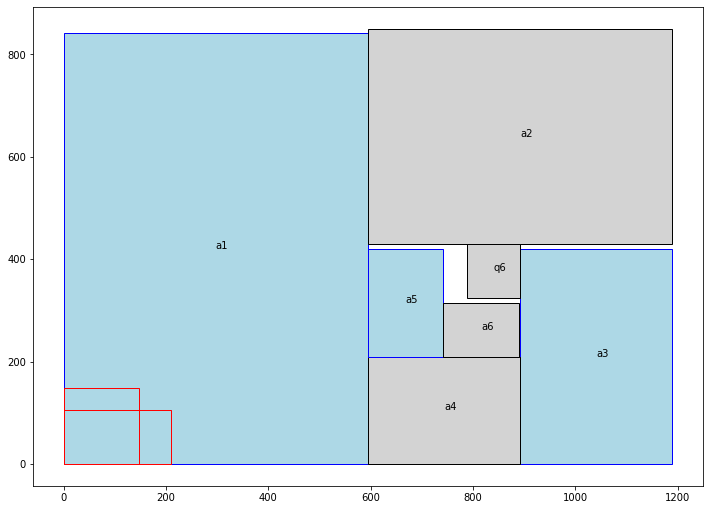

In [21]:
## import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 12]

plt.axes()
rectangle = plt.Rectangle((0,0), W, H, fc='white',ec="white")

# Create a Rectangle patch
for i in Items:
    if packed[i].varValue >= 0.9:
        if rotated[i].varValue == 0:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),width[i],height[i],edgecolor='black',facecolor='lightgray')
            plt.gca().add_patch(rect)
            centerx = width[i]  /2 + x_origin[i].varValue
            centery = height[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
        else:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),height[i],width[i],edgecolor='blue',facecolor='lightblue')
            plt.gca().add_patch(rect)
            centerx = height[i]  /2 + x_origin[i].varValue
            centery = width[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
    if packed[i].varValue < 0.9:
        rect = patches.Rectangle((0,0),width[i],height[i],edgecolor='red',facecolor='none')
        plt.gca().add_patch(rect)
        print(i,":",x_origin[i].varValue,y_origin[i].varValue,width[i],height[i] )



plt.axis('scaled')
plt.show()

# Zufällige werte

In [6]:
# A list of strings from "1" to "9" is created
for nItems in [4,6,8,10,12,14]:#,16,18,20]:
    print("Number of Items:",nItems)
    Items = range(nItems)
    ItemPairs = list(itertools.permutations(Items,2))

    random.seed( 15 )

    height = {x: random.randint(1,20) for x in range(nItems)}
    width = {x: random.randint(1,20) for x in range(nItems)}
    itemValue = {x: height[x] * random.randint(0,3) + width[x] * random.randint(0,5) for x in range(nItems)}

    W = int(nItems**(1/2) * 10);
    H = int(nItems**(1/2) * 8);

    prob = LpProblem("2D Backpack",LpMaximize)

    # The problem variables are created
    packed = LpVariable.dicts("packed",(Items),0,1,LpInteger)
    rotated = LpVariable.dicts("rotated",(Items),0,1,LpInteger)
    x_origin = LpVariable.dicts("x_origin",(Items),0,W)
    y_origin = LpVariable.dicts("y_origin",(Items),0,H)

    x_overlap_right = LpVariable.dicts("x_overlap_right",(ItemPairs),0,1,LpInteger)
    x_overlap_left = LpVariable.dicts("x_overlap_left",(ItemPairs),0,1,LpInteger)
    y_overlap_above = LpVariable.dicts("y_overlap_above",(ItemPairs),0,1,LpInteger)
    y_overlap_below = LpVariable.dicts("y_overlap_below",(ItemPairs),0,1,LpInteger)

    # The arbitrary objective function is added
    prob += lpSum([packed[i]*itemValue[i] for i in Items]), "Objective Function"

    for (i,j) in ItemPairs:
        prob += x_origin[j] - x_origin[i] - (1-rotated[i])*width[i] - rotated[i] * height[i] + x_overlap_right[i,j] * 1000 >= 0, "overlap right %s %s" %(i,j)
        prob += x_origin[j] + (1-rotated[j])*width[j] + rotated[j]*height[j] - x_origin[i] - x_overlap_left[i,j] * 1000 <= 0, "overlap left %s %s" %(i,j)
        prob += y_origin[j] - y_origin[i] - (1-rotated[i]) * height[i] - rotated[i] * width[i] + y_overlap_above[i,j] * 1000 >= 0, "overlap above %s %s" %(i,j)
        prob += y_origin[j] + (1-rotated[j])*height[j] + rotated[j]*width[j] - y_origin[i] - y_overlap_below[i,j] * 1000 <= 0, "overlap below %s %s" %(i,j)
        prob += x_overlap_right[i,j] + x_overlap_left[i,j] + y_overlap_below[i,j] + y_overlap_above[i,j] <= 3 + 3*((1-packed[i])+(1-packed[j])), "no overlap %s %s" %(i,j)

    for i in Items:
        prob += x_origin[i] + (1-rotated[i])*width[i] + rotated[i]* height[i] <= W + (1-packed[i]) * 1000 , "maxWidth %i" %i
        prob += y_origin[i] + (1-rotated[i])*height[i] + rotated[i] * width[i] <= H + (1-packed[i]) * 1000, "maxHeight %i" %i

    prob += W*H >= lpSum([packed[i] * width[i] * height[i] for i in Items]), "maxArea"

    # The problem is solved using PuLP's choice of Solver
    prob.solve()
    #prob.solve(GUROBI_CMD())
    print("Status = %s" % LpStatus[prob.status])
    # Print the value of the objective
    print("Objective = %f" % value(prob.objective))
    # Which items are packed
    counter = 0
    for i in Items:
        if packed[i].varValue >= 0.9:
            print(packed[i])
            counter = counter + 1

    print("---------------------")

Number of Items: 4
Status = Optimal
Objective = 65.000000
packed_0
packed_1
packed_2
packed_3
---------------------
Number of Items: 6


C:\Users\svenf\Anaconda3\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Status = Optimal
Objective = 142.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
---------------------
Number of Items: 8
Status = Optimal
Objective = 237.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
packed_6
packed_7
---------------------
Number of Items: 10
Status = Optimal
Objective = 433.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
packed_6
packed_7
packed_8
packed_9
---------------------
Number of Items: 12
Status = Optimal
Objective = 506.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
packed_6
packed_7
packed_8
packed_9
packed_10
packed_11
---------------------
Number of Items: 14
Status = Optimal
Objective = 534.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
packed_6
packed_7
packed_8
packed_9
packed_10
packed_11
packed_13
---------------------


12 : 0.0 0.0 14 11


(-1.85, 38.85, -1.4500000000000002, 30.45)

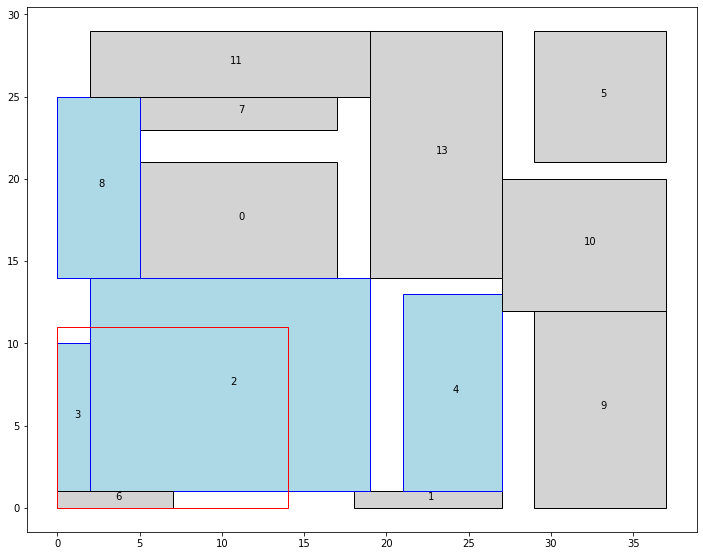

In [7]:
# import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 12]

plt.axes()
rectangle = plt.Rectangle((0,0), W, H, fc='white',ec="white")

# Create a Rectangle patch
for i in Items:
    if packed[i].varValue >= 0.9:
        if rotated[i].varValue == 0:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),width[i],height[i],edgecolor='black',facecolor='lightgray')
            plt.gca().add_patch(rect)
            centerx = width[i]  /2 + x_origin[i].varValue
            centery = height[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
        else:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),height[i],width[i],edgecolor='blue',facecolor='lightblue')
            plt.gca().add_patch(rect)
            centerx = height[i]  /2 + x_origin[i].varValue
            centery = width[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
    if packed[i].varValue < 0.9:
        rect = patches.Rectangle((0,0),width[i],height[i],edgecolor='red',facecolor='none')
        plt.gca().add_patch(rect)
        print(i,":",x_origin[i].varValue,y_origin[i].varValue,width[i],height[i] )



plt.axis('scaled')


In [2]:
# A list of strings from "1" to "9" is created
for nItems in [4,6,8,10,12]:#,16,18,20]:
    print("Number of Items:",nItems)
    Items = range(nItems)
    ItemPairs = list(itertools.permutations(Items,2))

    random.seed( 15 )

    height = {x: random.randint(1,20) for x in range(nItems)}
    width = {x: random.randint(1,20) for x in range(nItems)}
    itemValue = {x: height[x] * random.randint(0,3) + width[x] * random.randint(0,5) for x in range(nItems)}

    W = int(nItems**(1/2) * 10);
    H = int(nItems**(1/2) * 8);

    prob = LpProblem("2D Backpack",LpMaximize)

    # The problem variables are created
    packed = LpVariable.dicts("packed",(Items),0,1,LpInteger)
    rotated = LpVariable.dicts("rotated",(Items),0,1,LpInteger)
    x_origin = LpVariable.dicts("x_origin",(Items),0,W)
    y_origin = LpVariable.dicts("y_origin",(Items),0,H)

    x_overlap_right = LpVariable.dicts("x_overlap_right",(ItemPairs),0,1,LpInteger)
    x_overlap_left = LpVariable.dicts("x_overlap_left",(ItemPairs),0,1,LpInteger)
    y_overlap_above = LpVariable.dicts("y_overlap_above",(ItemPairs),0,1,LpInteger)
    y_overlap_below = LpVariable.dicts("y_overlap_below",(ItemPairs),0,1,LpInteger)

    # The arbitrary objective function is added
    prob += lpSum([packed[i]*itemValue[i] for i in Items]), "Objective Function"

    for (i,j) in ItemPairs:
        prob += x_origin[j] - x_origin[i] - (1-rotated[i])*width[i] - rotated[i] * height[i] + x_overlap_right[i,j] * 1000 >= 0, "overlap right %s %s" %(i,j)
        prob += x_origin[j] + (1-rotated[j])*width[j] + rotated[j]*height[j] - x_origin[i] - x_overlap_left[i,j] * 1000 <= 0, "overlap left %s %s" %(i,j)
        prob += y_origin[j] - y_origin[i] - (1-rotated[i]) * height[i] - rotated[i] * width[i] + y_overlap_above[i,j] * 1000 >= 0, "overlap above %s %s" %(i,j)
        prob += y_origin[j] + (1-rotated[j])*height[j] + rotated[j]*width[j] - y_origin[i] - y_overlap_below[i,j] * 1000 <= 0, "overlap below %s %s" %(i,j)
        prob += x_overlap_right[i,j] + x_overlap_left[i,j] + y_overlap_below[i,j] + y_overlap_above[i,j] <= 3 + 3*((1-packed[i])+(1-packed[j])), "no overlap %s %s" %(i,j)

    for i in Items:
        prob += x_origin[i] + (1-rotated[i])*width[i] + rotated[i]* height[i] <= W + (1-packed[i]) * 1000 , "maxWidth %i" %i
        prob += y_origin[i] + (1-rotated[i])*height[i] + rotated[i] * width[i] <= H + (1-packed[i]) * 1000, "maxHeight %i" %i

    prob += W*H >= lpSum([packed[i] * width[i] * height[i] for i in Items]), "maxArea"

    # The problem is solved using PuLP's choice of Solver
    prob.solve()
    #prob.solve(GUROBI_CMD())
    print("Status = %s" % LpStatus[prob.status])
    # Print the value of the objective
    print("Objective = %f" % value(prob.objective))
    # Which items are packed
    counter = 0
    for i in Items:
        if packed[i].varValue >= 0.9:
            print(packed[i])
            counter = counter + 1

    print("---------------------")

Number of Items: 4
Status = Optimal
Objective = 65.000000
packed_0
packed_1
packed_2
packed_3
---------------------
Number of Items: 6


C:\Users\svenf\Anaconda3\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Status = Optimal
Objective = 142.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
---------------------
Number of Items: 8
Status = Optimal
Objective = 237.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
packed_6
packed_7
---------------------
Number of Items: 10
Status = Optimal
Objective = 433.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
packed_6
packed_7
packed_8
packed_9
---------------------
Number of Items: 12
Status = Optimal
Objective = 506.000000
packed_0
packed_1
packed_2
packed_3
packed_4
packed_5
packed_6
packed_7
packed_8
packed_9
packed_10
packed_11
---------------------


# Keine Schneitbarkeit gegeben

(-1.7000000000000002, 35.7, -1.35, 28.35)

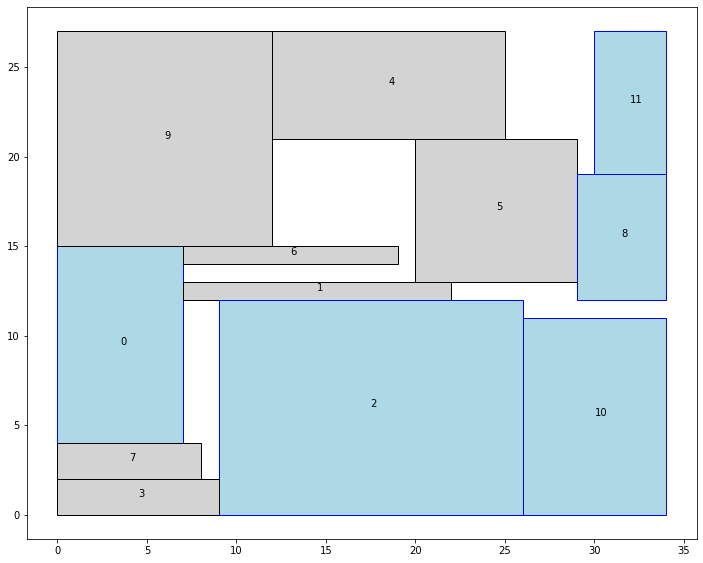

In [4]:
# import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 12]

plt.axes()
rectangle = plt.Rectangle((0,0), W, H, fc='white',ec="white")

# Create a Rectangle patch
for i in Items:
    if packed[i].varValue >= 0.9:
        if rotated[i].varValue == 0:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),width[i],height[i],edgecolor='black',facecolor='lightgray')
            plt.gca().add_patch(rect)
            centerx = width[i]  /2 + x_origin[i].varValue
            centery = height[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
        else:
            rect = patches.Rectangle((x_origin[i].varValue,y_origin[i].varValue),height[i],width[i],edgecolor='blue',facecolor='lightblue')
            plt.gca().add_patch(rect)
            centerx = height[i]  /2 + x_origin[i].varValue
            centery = width[i] /2 + y_origin[i].varValue 
            plt.text(centerx, centery,'%s'%i)
    if packed[i].varValue < 0.9:
        rect = patches.Rectangle((0,0),width[i],height[i],edgecolor='red',facecolor='none')
        plt.gca().add_patch(rect)
        print(i,":",x_origin[i].varValue,y_origin[i].varValue,width[i],height[i] )



plt.axis('scaled')
